In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import animation
# import seaborn as sns
# from scipy.optimize import curve_fit
plt.style.use("dark_background")

$\Large The \ Graphical \ Representation$

In [2]:
def graphic_bd_rlx(num_bins=200, num_particles=100_000, color_change=10_000, num_colors=3):
    """
    Generates Graphical Data for Ballistic Deposition with Relaxation.
    """
    # The parameters of the ballistic depostion are determined:
    # num_bins
    # num_particles
    # The color of the graph will change every time this many particles are deposited:
    # color_change
    # The height of every bin will be changed randomly with the deposition of a paricle at every instance of time.
    h = np.zeros(num_bins, dtype=int)
    # The pixels that will be used to graph the image are initialized to zero:
    image_matrix = np.zeros((num_particles, num_bins))
    
    
    # The main part of the code:
    for i in range(num_particles):
        # Changing the color with some math tricks and periodically choosing from [0,1,2,...,num_colors]:
        if (i%color_change)==0:
            color = (i//color_change)%num_colors + 1
        
        
        # Choosing a random bin at every instance to deposit a particle into:
        bin = np.random.randint(num_bins)
        # Checking the neighboring bins and choosing the one with minimum height:
        if (bin==0):
            bin = (num_bins - 1 + np.argmin([h[-1], h[0], h[1]])) % num_bins
        elif (bin==num_bins-1):
            bin = (num_bins - 2 + np.argmin([h[-2], h[-1], h[0]])) % num_bins
        elif (h[(bin+1)] < h[bin]) or (h[(bin-1)] < h[bin]):
            if h[bin+1] != h[bin-1]:
                bin = bin - 1 + np.argmin([h[bin-1], h[bin], h[bin+1]])
            else:  # If the side bins were of equal heights, must randomly choose one of them:
                bin = bin + np.random.choice([-1, 1], p=[0.5, 0.5])
        

        # With the deposition of a particle, the height of the bin increases by 1:
        h[bin] += 1
        # The matrix of the pixels of the image is filled with [0,1,2,...,num_colors] for determining the color:
        image_matrix[h[bin], bin] = color
    return image_matrix

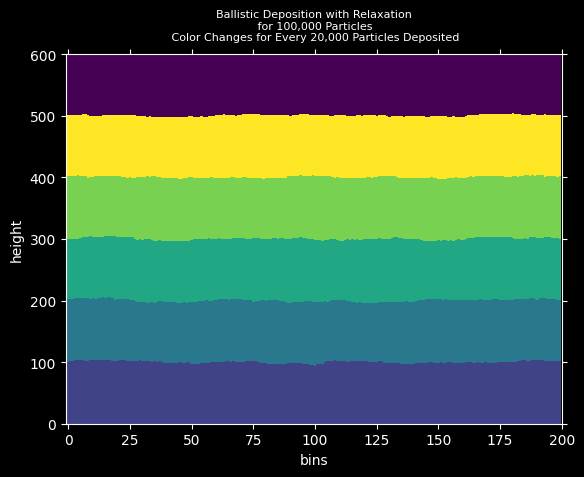

In [10]:
# The plot is initialized:
fig, ax = plt.subplots()
ax.clear()
num_bins = 200
color_change = 20_000
image_matrix = graphic_bd_rlx(color_change=color_change, num_colors=5)
# plt.imshow() is very efficient and significantly faster than other plotting methods.
ax.imshow(image_matrix, interpolation="nearest", aspect="auto")
ax.set_xlim((-1,num_bins))
ax.set_ylim(0, 600)
ax.set_xlabel("bins")
ax.set_ylabel("height")
ax.set_title(f"Ballistic Deposition with Relaxation\n \
for 100,000 Particles\n \
Color Changes for Every 20,000 Particles Deposited", fontsize=8, pad=10);

In [11]:
# fig.savefig("BDSurfRelxGraphic.jpg")

$\large Calculating \ the \ Numerical \ Data \ from \ the \ Deposition \ Model$

In [3]:
def numeric_bd_rlx(num_bins=200, num_particles=100_000, num_snap_shots=100, log_snapshots=False):
    """
    Generates Data for Ballistic Deposition with Relaxation.

    num_snap_shots is the number of snapshots we take to to study the layers;
    in other words, at most this many points will be on the scatter plot.
    If log_snapshots is True, snapshots will be taken in intervals that increase with the power of 2.
    """
    # The parameters of the ballistic depostion are determined:
    num_bins = num_bins
    num_particles = num_particles
    index = 0
    # The height of every bin will be changed randomly with the deposition of a paricle at every instance of time.
    h = np.zeros(num_bins, dtype=int)
    scatter_matrix = np.zeros((num_snap_shots, num_bins))
    
    # The main part of the code:
    for i in range(num_particles):        
        # Choosing a random bin at every instance to deposit a particle into:
        bin = np.random.randint(num_bins)
        # Checking the neighboring bins and choosing the one with minimum height:
        if (bin==0):
            bin = (num_bins - 1 + np.argmin([h[-1], h[0], h[1]])) % num_bins
        elif (bin==num_bins-1):
            bin = (num_bins - 2 + np.argmin([h[-2], h[-1], h[0]])) % num_bins
        elif (h[(bin+1)] < h[bin]) or (h[(bin-1)] < h[bin]):
            if h[bin+1] != h[bin-1]:
                bin = bin - 1 + np.argmin([h[bin-1], h[bin], h[bin+1]])
            else:  # If the side bins were of equal height, must randomly choose one with equal probability:
                bin = bin + np.random.choice([-1, 1], p=[0.5, 0.5])
        

        # With the deposition of a particle, the height of the bin increases by 1:
        h[bin] += 1
        # Take 100 (or num_snap_shots) snapshots from h and put in scatter_matrix:
        # Logarithmic snapshots maybe taken which means after depositing 2, 4, 8, 16, ... layers, one snapshot
        # is taken.
        if log_snapshots:
            if(i == np.power(2, (index+1))):
                scatter_matrix[index] = h
                index += 1
        else:
            if((i+1)%(num_particles//num_snap_shots) == 0):
                scatter_matrix[index] = h
                index += 1

        
    return scatter_matrix

In [4]:
"""
Mean height and SD for 4 layers (every 250,000 particles):
"""

num_snap_shots = 4
scatter_matrix = numeric_bd_rlx(num_particles=1_000_000, num_snap_shots=num_snap_shots)

for i in range(num_snap_shots):
    print(f"mean height after deposition of {25000*(i+1)} particles:\
                {np.mean(scatter_matrix, axis=1)[i]}")
    print(f"standard deviation after deposition of {25000*(i+1)} particles:\
         {np.std(scatter_matrix, axis=1)[i]}")
    print("\n\n")

mean height after deposition of 25000 particles:                1250.0
standard deviation after deposition of 25000 particles:         4.28485705712571



mean height after deposition of 50000 particles:                2500.0
standard deviation after deposition of 50000 particles:         4.233202097703345



mean height after deposition of 75000 particles:                3750.0
standard deviation after deposition of 75000 particles:         2.009975124224178



mean height after deposition of 100000 particles:                5000.0
standard deviation after deposition of 100000 particles:         2.6343879744638983





In [42]:
"""
Plot the data for 4M particles and try to fit. (4M takes 3.5 minutes; 5M, 4.5 mins)
"""


num_samples = 10
num_particles = 5_000_000
num_snap_shots = int(np.log2(num_particles))
matrix_10_100 = np.zeros((num_samples, num_snap_shots))
for i in range(10):
    matrix_10_100[i] = np.std(numeric_bd_rlx(num_particles=num_particles,
                                             num_snap_shots=num_snap_shots,
                                             log_snapshots=True), axis=1)


y = np.log2(np.mean(matrix_10_100, axis=0))
x = np.arange(1, num_snap_shots+1)

In [91]:
print(f"Number of points on the scatter plot: {x.shape[0]}")

Number of points on the scatter plot: 22


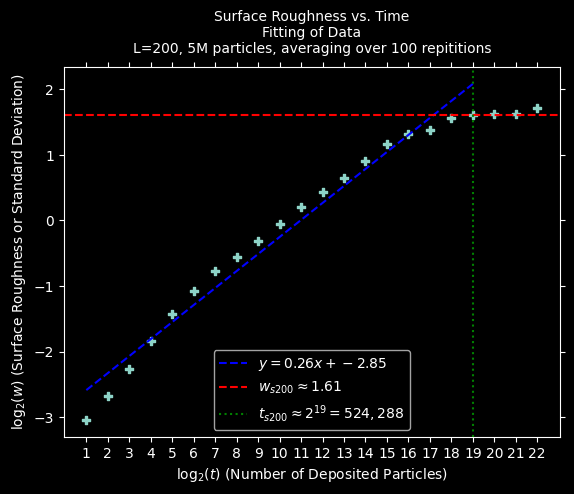

In [228]:
"""
Plotting the data and fitting the lines for 5,000,000 particles, and finding w_s and t_s.
I plotted the data and determined t_s and w_s approximately, by looking at the plot.
"""


coefs1 = np.polynomial.polynomial.polyfit(x[:-3], y[:-3], deg=1)
ffit1 = np.polynomial.polynomial.polyval(x[:-3], coefs1)

fig, ax = plt.subplots()
ax.clear()

ax.scatter(x,y, marker="P")

ax.plot(x[:-3], ffit1, "b--", label=f"$y = {coefs1[1]:.2f}x + {coefs1[0]:.2f}$")

ax.axhline(y[18], color="red", linestyle="--",
            label=f"$w_{{s200}} \\approx {y[18]:.2f}$")

ax.axvline(x[18], color="green", linestyle=":", label="$t_{s200} \\approx 2^{19} = 524,288$")

ax.set_xlabel("$\\log_2(t)$ (Number of Deposited Particles)")
ax.set_ylabel("$\\log_2(w)$ (Surface Roughness or Standard Deviation)")
ax.set_title("Surface Roughness vs. Time\nFitting of Data\n"
             "L=200, 5M particles, averaging over 100 repititions",
            fontsize=10, pad=10)
ax.set_xticks(x)
ax.legend();

In [229]:
fig.savefig("L200.jpg")

$\large Repeat \ the \ process \ and \ find \ w_s \ and \ t_s \ for \ different \ values \ of \ L.$

In [93]:
"""
L = 300 (4.5 mins)
"""

num_bins = 300
num_samples = 10
num_particles = 5_000_000
num_snap_shots = int(np.log2(num_particles))
matrix_10_100 = np.zeros((num_samples, num_snap_shots))
for i in range(10):
    matrix_10_100[i] = np.std(numeric_bd_rlx(num_bins=num_bins,
                                             num_particles=num_particles,
                                             num_snap_shots=num_snap_shots,
                                             log_snapshots=True), axis=1)


y_L300 = np.log2(np.mean(matrix_10_100, axis=0))
x_L300 = np.arange(1, num_snap_shots+1)

In [94]:
print(f"Number of points on the scatter plot: {x_L300.shape[0]}")

Number of points on the scatter plot: 22


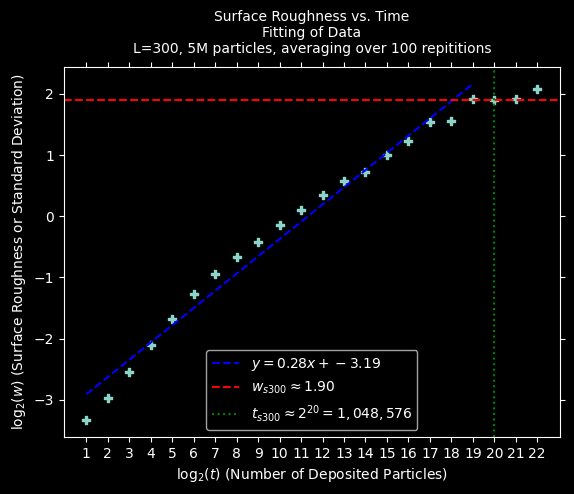

In [220]:
"""
Plotting the data and fitting the lines for 5,000,000 particles, and finding w_s and t_s.
I plotted the data and determined t_s and w_s approximately, by looking at the plot.
"""


coefs1 = np.polynomial.polynomial.polyfit(x_L300[:-3], y_L300[:-3], deg=1)
ffit1 = np.polynomial.polynomial.polyval(x_L300[:-3], coefs1)

fig, ax = plt.subplots()
ax.clear()

ax.scatter(x_L300, y_L300, marker="P")

ax.plot(x_L300[:-3], ffit1, "b--", label=f"$y = {coefs1[1]:.2f}x + {coefs1[0]:.2f}$")

ax.axhline(y_L300[19], color="red", linestyle="--",
            label=f"$w_{{s300}} \\approx {y_L300[19]:.2f}$")

ax.axvline(x_L300[19], color="green", linestyle=":", label="$t_{s300} \\approx 2^{20} = 1,048,576$")

ax.set_xlabel("$\\log_2(t)$ (Number of Deposited Particles)")
ax.set_ylabel("$\\log_2(w)$ (Surface Roughness or Standard Deviation)")
ax.set_title("Surface Roughness vs. Time\nFitting of Data\n"
             "L=300, 5M particles, averaging over 100 repititions",
            fontsize=10, pad=10)
ax.set_xticks(x_L300)
ax.legend();

In [221]:
fig.savefig("L300.jpg")

In [133]:
"""
L = 150 (55 seconds)
"""

num_bins = 150
num_samples = 10
num_particles = 1_000_000
num_snap_shots = int(np.log2(num_particles))
matrix_10_100 = np.zeros((num_samples, num_snap_shots))
for i in range(10):
    matrix_10_100[i] = np.std(numeric_bd_rlx(num_bins=num_bins,
                                             num_particles=num_particles,
                                             num_snap_shots=num_snap_shots,
                                             log_snapshots=True), axis=1)


y_L150 = np.log2(np.mean(matrix_10_100, axis=0))
x_L150 = np.arange(1, num_snap_shots+1)

In [137]:
print(f"Number of points on the scatter plot: {x_L150.shape[0]}")

Number of points on the scatter plot: 19


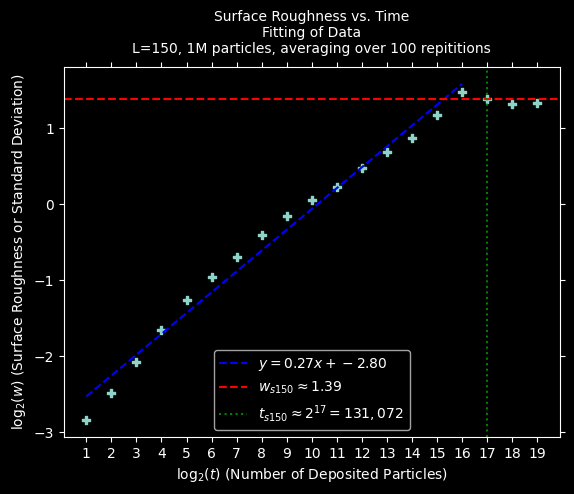

In [222]:
"""
Plotting the data and fitting the lines for 5,000,000 particles, and finding w_s and t_s.
I plotted the data and determined t_s and w_s approximately, by looking at the plot.
"""


coefs1 = np.polynomial.polynomial.polyfit(x_L150[:-3], y_L150[:-3], deg=1)
ffit1 = np.polynomial.polynomial.polyval(x_L150[:-3], coefs1)

fig, ax = plt.subplots()
ax.clear()

ax.scatter(x_L150,y_L150, marker="P")

ax.plot(x_L150[:-3], ffit1, "b--", label=f"$y = {coefs1[1]:.2f}x + {coefs1[0]:.2f}$")

ax.axhline(y_L150[16], color="red", linestyle="--",
            label=f"$w_{{s150}} \\approx {y_L150[16]:.2f}$")

ax.axvline(x_L150[16], color="green", linestyle=":", label="$t_{s150} \\approx 2^{17} = 131,072$")

ax.set_xlabel("$\\log_2(t)$ (Number of Deposited Particles)")
ax.set_ylabel("$\\log_2(w)$ (Surface Roughness or Standard Deviation)")
ax.set_title("Surface Roughness vs. Time\nFitting of Data\n"
             "L=150, 1M particles, averaging over 100 repititions",
            fontsize=10, pad=10)
ax.set_xticks(x_L150)
ax.legend();

In [223]:
fig.savefig("L150.jpg")

In [171]:
"""
L = 100 (55 seconds)
"""

num_bins = 100
num_samples = 10
num_particles = 1_000_000
num_snap_shots = int(np.log2(num_particles))
matrix_10_100 = np.zeros((num_samples, num_snap_shots))
for i in range(10):
    matrix_10_100[i] = np.std(numeric_bd_rlx(num_bins=num_bins,
                                             num_particles=num_particles,
                                             num_snap_shots=num_snap_shots,
                                             log_snapshots=True), axis=1)


y_L100 = np.log2(np.mean(matrix_10_100, axis=0))
x_L100 = np.arange(1, num_snap_shots+1)

In [174]:
print(f"Number of points on the scatter plot: {x_L100.shape[0]}")

Number of points on the scatter plot: 19


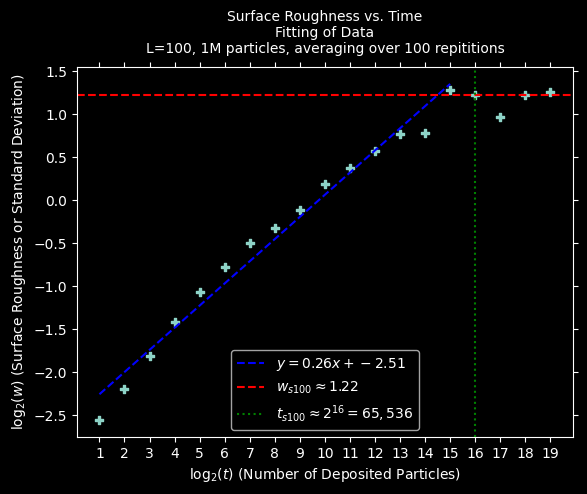

In [224]:
"""
Plotting the data and fitting the lines for 5,000,000 particles, and finding w_s and t_s.
I plotted the data and determined t_s and w_s approximately, by looking at the plot.
"""


coefs1 = np.polynomial.polynomial.polyfit(x_L100[:-4], y_L100[:-4], deg=1)
ffit1 = np.polynomial.polynomial.polyval(x_L100[:-4], coefs1)


fig, ax = plt.subplots()
ax.clear()

ax.scatter(x_L100,y_L100, marker="P")

ax.plot(x_L100[:-4], ffit1, "b--", label=f"$y = {coefs1[1]:.2f}x + {coefs1[0]:.2f}$")

ax.axhline(y_L100[15], color="red", linestyle="--",
            label=f"$w_{{s100}} \\approx {y_L100[15]:.2f}$")

ax.axvline(x_L100[15], color="green", linestyle=":", label="$t_{s100} \\approx 2^{16} = 65,536$")

ax.set_xlabel("$\\log_2(t)$ (Number of Deposited Particles)")
ax.set_ylabel("$\\log_2(w)$ (Surface Roughness or Standard Deviation)")
ax.set_title("Surface Roughness vs. Time\nFitting of Data\n"
             "L=100, 1M particles, averaging over 100 repititions",
            fontsize=10, pad=10)
ax.set_xticks(x_L100)
ax.legend();

In [225]:
fig.savefig("L100.jpg")

In [195]:
"""
L = 50 (27 seconds)
"""

num_bins = 50
num_samples = 10
num_particles = 500_000
num_snap_shots = int(np.log2(num_particles))
matrix_10_100 = np.zeros((num_samples, num_snap_shots))
for i in range(10):
    matrix_10_100[i] = np.std(numeric_bd_rlx(num_bins=num_bins,
                                             num_particles=num_particles,
                                             num_snap_shots=num_snap_shots,
                                             log_snapshots=True), axis=1)


y_L50 = np.log2(np.mean(matrix_10_100, axis=0))
x_L50 = np.arange(1, num_snap_shots+1)

In [190]:
print(f"Number of points on the scatter plot: {x_L50.shape[0]}")

Number of points on the scatter plot: 18


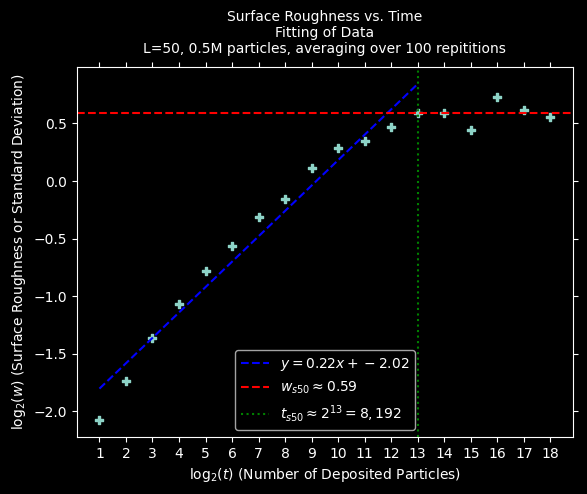

In [226]:
"""
Plotting the data and fitting the lines for 5,000,000 particles, and finding w_s and t_s.
I plotted the data and determined t_s and w_s approximately, by looking at the plot.
"""


coefs1 = np.polynomial.polynomial.polyfit(x_L50[:-5], y_L50[:-5], deg=1)
ffit1 = np.polynomial.polynomial.polyval(x_L50[:-5], coefs1)

fig, ax = plt.subplots()
ax.clear()

ax.scatter(x_L50,y_L50, marker="P")

ax.plot(x_L50[:-5], ffit1, "b--", label=f"$y = {coefs1[1]:.2f}x + {coefs1[0]:.2f}$")

ax.axhline(y_L50[12], color="red", linestyle="--",
            label=f"$w_{{s50}} \\approx {y_L50[12]:.2f}$")

ax.axvline(x_L50[12], color="green", linestyle=":", label="$t_{s50} \\approx 2^{13} = 8,192$")

ax.set_xlabel("$\\log_2(t)$ (Number of Deposited Particles)")
ax.set_ylabel("$\\log_2(w)$ (Surface Roughness or Standard Deviation)")
ax.set_title("Surface Roughness vs. Time\nFitting of Data\n"
             "L=50, 0.5M particles, averaging over 100 repititions",
            fontsize=10, pad=10)
ax.set_xticks(x_L50)
ax.legend();

In [227]:
fig.savefig("L50.jpg")

In [244]:
"""
L = 20 (11 seconds)
"""

num_bins = 20
num_samples = 10
num_particles = 200_000
num_snap_shots = int(np.log2(num_particles))
matrix_10_100 = np.zeros((num_samples, num_snap_shots))
for i in range(10):
    matrix_10_100[i] = np.std(numeric_bd_rlx(num_bins=num_bins,
                                             num_particles=num_particles,
                                             num_snap_shots=num_snap_shots,
                                             log_snapshots=True), axis=1)


y_L20 = np.log2(np.mean(matrix_10_100, axis=0))
x_L20 = np.arange(1, num_snap_shots+1)

In [245]:
print(f"Number of points on the scatter plot: {x_L20.shape[0]}")

Number of points on the scatter plot: 17


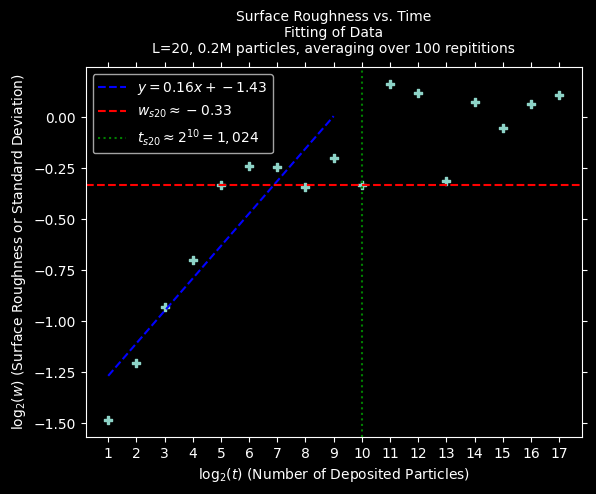

In [246]:
"""
Plotting the data and fitting the lines for 5,000,000 particles, and finding w_s and t_s.
I plotted the data and determined t_s and w_s approximately, by looking at the plot.
"""


coefs1 = np.polynomial.polynomial.polyfit(x_L20[:9], y_L20[:9], deg=1)
ffit1 = np.polynomial.polynomial.polyval(x_L20[:9], coefs1)

fig, ax = plt.subplots()
ax.clear()

ax.scatter(x_L20,y_L20, marker="P")

ax.plot(x_L20[:9], ffit1, "b--", label=f"$y = {coefs1[1]:.2f}x + {coefs1[0]:.2f}$")

ax.axhline(y_L20[9], color="red", linestyle="--",
            label=f"$w_{{s20}} \\approx {y_L20[9]:.2f}$")

ax.axvline(x_L20[9], color="green", linestyle=":", label="$t_{s20} \\approx 2^{10} = 1,024$")

ax.set_xlabel("$\\log_2(t)$ (Number of Deposited Particles)")
ax.set_ylabel("$\\log_2(w)$ (Surface Roughness or Standard Deviation)")
ax.set_title("Surface Roughness vs. Time\nFitting of Data\n"
             "L=20, 0.2M particles, averaging over 100 repititions",
            fontsize=10, pad=10)
ax.set_xticks(x_L20)
ax.legend();

In [217]:
# fig.savefig("L20.jpg")

$\Large Plotting \ L, \ w_s \ and \ t_s \ and \ finding \ \alpha, \ \beta, \ z$

In [312]:
ws_list = [y_L20[9], y_L50[12], y_L100[15], y_L150[16], y[18], y_L300[19]]
ts_list = np.array([x_L20[9], x_L50[12], x_L100[15], x_L150[16], x[18], x_L300[19]], dtype=float)
Ls_list = np.log2([20, 50, 100, 150, 200, 300])

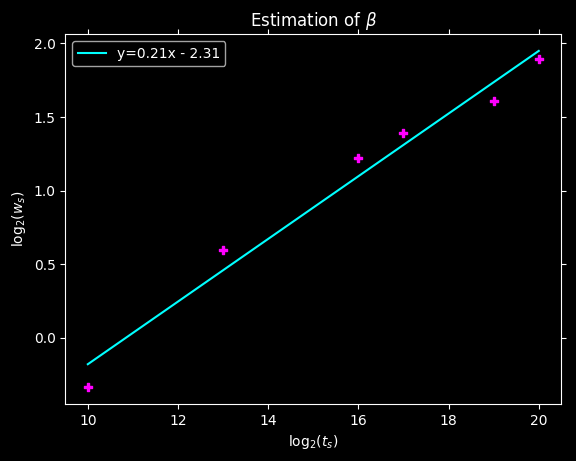

In [318]:
"""
Estimating beta:
"""


# Fitting data and obtaining beta:
beta_coefs = np.polynomial.polynomial.polyfit(ts_list, ws_list, deg=1)
# Plotting:
fig, ax = plt.subplots()
ax.clear()
ax.scatter(ts_list, ws_list, marker="P", color="fuchsia")
ax.plot(ts_list, beta_coefs[0]+beta_coefs[1]*ts_list, color="aqua",
        label=f"y={beta_coefs[1]:.2f}x - {abs(beta_coefs[0]):.2f}")
ax.set_xlabel("$\\log_2({t_s})$")
ax.set_ylabel("$\\log_2({w_s})$")
ax.set_title("Estimation of $\\beta$")
ax.legend();

In [314]:
# fig.savefig("beta.jpg")

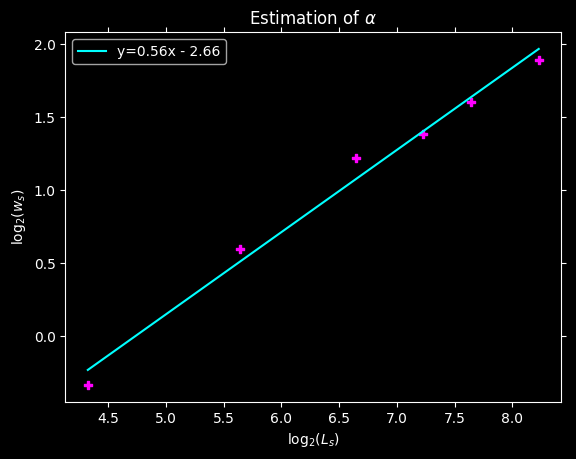

In [319]:
"""
Estimating alpha:
"""


# Fitting data and obtaining beta:
alpha_coefs = np.polynomial.polynomial.polyfit(Ls_list, ws_list, deg=1)
# Plotting:
fig, ax = plt.subplots()
ax.clear()
ax.scatter(Ls_list, ws_list, marker="P", color="fuchsia")
ax.plot(Ls_list, alpha_coefs[0]+alpha_coefs[1]*Ls_list, color="aqua",
        label=f"y={alpha_coefs[1]:.2f}x - {abs(alpha_coefs[0]):.2f}")
ax.set_xlabel("$\\log_2({L_s})$")
ax.set_ylabel("$\\log_2({w_s})$")
ax.set_title("Estimation of $\\alpha$")
ax.legend();

In [316]:
fig.savefig("alpha.jpg")

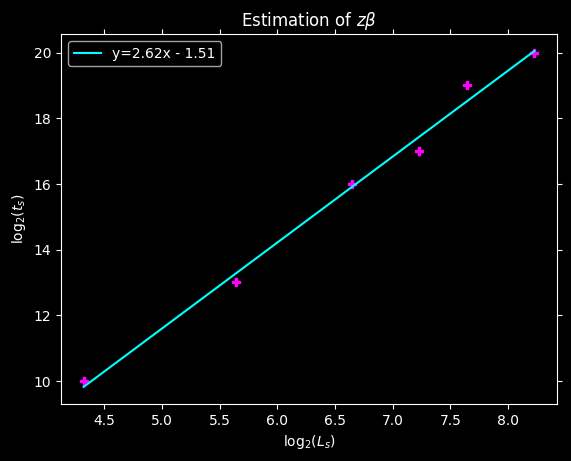

In [320]:
"""
Estimating z*beta:
"""


# Fitting data and obtaining beta:
zbeta_coefs = np.polynomial.polynomial.polyfit(Ls_list, ts_list, deg=1)
# Plotting:
fig, ax = plt.subplots()
ax.clear()
ax.scatter(Ls_list, ts_list, marker="P", color="fuchsia")
ax.plot(Ls_list, zbeta_coefs[0]+zbeta_coefs[1]*Ls_list, color="aqua",
        label=f"y={zbeta_coefs[1]:.2f}x - {abs(zbeta_coefs[0]):.2f}")
ax.set_xlabel("$\\log_2({L_s})$")
ax.set_ylabel("$\\log_2({t_s})$")
ax.set_title("Estimation of $z\\beta$")
ax.legend();

In [321]:
fig.savefig("zbeta.jpg")

In [ ]:
z = alpha_coefs[1] / beta_coefs[1]
print(f"alpha = {alpha_coefs[1]}\n\
beta = {beta_coefs[1]}\n\
z = {z}")